
### Task 1: Object Detection

In [16]:
# Importing libaries
import cv2
import matplotlib.pyplot as plt

In [17]:
# Threshold to detect object
thres = 0.56

In [18]:
#Labels
classNames= []
classFile = r'C:\object detection project\coco.names'
with open(classFile,'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')

In [19]:
#loading pre-trained model from disk
configPath = r'C:\object detection project\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weightsPath = r'C:\object detection project\frozen_inference_graph.pb'

In [20]:
#defining model
net = cv2.dnn_DetectionModel(weightsPath,configPath)
net.setInputSize(320,320)
net.setInputScale(1.0/ 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

< cv2.dnn.Model 000001874A1E2230>

### Testing model on Image

In [21]:
#loading image
image=r'C:\object detection project\check.jpg'
img = cv2.imread(image)

In [22]:
classIds, confs, bbox = net.detect(img,confThreshold=thres)
if len(classIds) != 0:
    for classId, confidence,box in zip(classIds.flatten(),confs.flatten(),bbox):
        # draw the bounding box on the image
        cv2.rectangle(img,box,color=(255,0,0),thickness=3)
        cv2.putText(img,classNames[classId-1].upper(),(box[0]+5,box[1]+30),
                    cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2)
        cv2.putText(img,str(round(confidence*100,2)),(box[0]+5,box[1]+55),
                    cv2.FONT_HERSHEY_COMPLEX,0.6,(255,0,0),2)

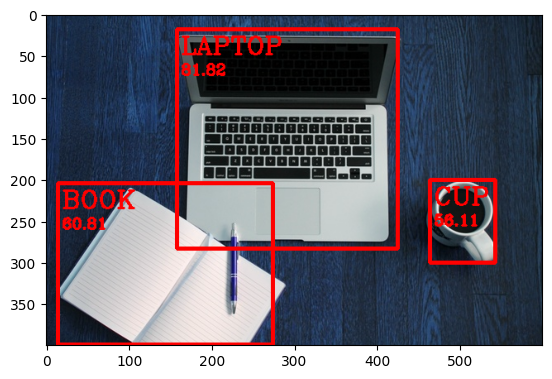

In [23]:
#show result
plt.imshow(img)

### Testing model on Video

In [24]:
import os
import cv2

# Set the threshold
thres = 0.5

# Load class names (replace with actual class names for your model)
classNames = ['Class1', 'Class2', 'Class3']  # Replace with the actual class names

# Paths to model files (replace these with the actual paths to your model files)
model_path = r'C:\object detection project\frozen_inference_graph.pb'  # Replace with the actual path to your .caffemodel file
config_path = r'C:\object detection project\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'   # Replace with the actual path to your .prototxt file

# Check if the model files exist
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found: {model_path}")
if not os.path.exists(config_path):
    raise FileNotFoundError(f"Config file not found: {config_path}")

# Load the network
try:
    net = cv2.dnn_DetectionModel(model_path, config_path)
    net.setInputSize(320, 320)
    net.setInputScale(1.0 / 127.5)
    net.setInputMean((127.5, 127.5, 127.5))
    net.setInputSwapRB(True)
except cv2.error as e:
    print(f"Error loading the model: {e}")
    raise

# Load video
cap = cv2.VideoCapture(r'C:\object detection project\video1.mkv')
cap.set(3, 1280)
cap.set(4, 720)
cap.set(10, 70)

while True:
    success, img = cap.read()
    if not success:
        print("Failed to read frame from video.")
        break

    if img is None:
        print("Empty frame encountered.")
        break

    classIds, confs, bbox = net.detect(img, confThreshold=thres)
    #print(classIds, bbox)

    if len(classIds) != 0:
        for classId, confidence, box in zip(classIds.flatten(), confs.flatten(), bbox):
            # Check if classId is within the valid range
            if 0 < classId <= len(classNames):
                cv2.rectangle(img, box, (0, 0, 255), 1)
                cv2.putText(img, classNames[classId - 1].upper(), (box[0] + 10, box[1] + 30),
                            cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 255), 1)
            else:
                print(f"Invalid classId: {classId}")

    cv2.imshow("Output Video", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


Invalid classId: 6
Invalid classId: 6
Invalid classId: 8
Invalid classId: 8
Invalid classId: 6
Invalid classId: 6
Invalid classId: 6
Invalid classId: 6
Invalid classId: 6
Invalid classId: 6
Invalid classId: 8
Invalid classId: 8
Invalid classId: 8
Invalid classId: 6
Invalid classId: 6
Invalid classId: 8
Invalid classId: 6
Invalid classId: 8
Invalid classId: 6
Invalid classId: 8
Invalid classId: 6
Invalid classId: 6
Invalid classId: 6
Invalid classId: 6
Invalid classId: 6
Invalid classId: 6
Invalid classId: 8
Invalid classId: 6
Invalid classId: 6
Invalid classId: 6
Invalid classId: 6
Invalid classId: 8
Invalid classId: 6
Invalid classId: 8
Invalid classId: 6
Invalid classId: 6
Invalid classId: 8
Invalid classId: 6
Invalid classId: 8
Invalid classId: 6
Invalid classId: 8
Invalid classId: 8
Invalid classId: 6
Invalid classId: 8
Invalid classId: 8
Invalid classId: 6
Invalid classId: 8
Invalid classId: 6
Invalid classId: 8
Invalid classId: 6
Invalid classId: 8
Invalid classId: 6
Invalid clas

In [25]:
import os
import cv2

# Set the threshold
thres = 0.5

# Load class names (replace with actual class names for your model)
classNames = ['Class1', 'Class2', 'Class3']  # Replace with the actual class names

# Paths to model files (replace these with the actual paths to your model files)
model_path = r'C:\object detection project\frozen_inference_graph.pb'  # Replace with the actual path to your .caffemodel file
config_path = r'C:\object detection project\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'   # Replace with the actual path to your .prototxt file

# Check if the model files exist
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found: {model_path}")
if not os.path.exists(config_path):
    raise FileNotFoundError(f"Config file not found: {config_path}")

# Load the network
try:
    net = cv2.dnn_DetectionModel(model_path, config_path)
    net.setInputSize(320, 320)
    net.setInputScale(1.0 / 127.5)
    net.setInputMean((127.5, 127.5, 127.5))
    net.setInputSwapRB(True)
except cv2.error as e:
    print(f"Error loading the model: {e}")
    raise

# Load video
cap = cv2.VideoCapture(r'C:\object detection project\video2.mp4')
cap.set(3, 1280)
cap.set(4, 720)
cap.set(10, 70)

while True:
    success, img = cap.read()
    if not success:
        print("Failed to read frame from video.")
        break

    if img is None:
        print("Empty frame encountered.")
        break

    classIds, confs, bbox = net.detect(img, confThreshold=thres)
    #print(classIds, bbox)

    if len(classIds) != 0:
        for classId, confidence, box in zip(classIds.flatten(), confs.flatten(), bbox):
            # Check if classId is within the valid range
            if 0 < classId <= len(classNames):
                cv2.rectangle(img, box, (0, 0, 255), 1)
                cv2.putText(img, classNames[classId - 1].upper(), (box[0] + 10, box[1] + 30),
                            cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 255), 1)
            else:
                print(f"Invalid classId: {classId}")

    cv2.imshow("Output Video", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


Invalid classId: 16
Invalid classId: 16
Invalid classId: 16
Invalid classId: 16
Invalid classId: 35
Invalid classId: 16
Invalid classId: 16
Invalid classId: 16
Invalid classId: 16
Invalid classId: 16
Invalid classId: 16
Failed to read frame from video.
